# BTC : Historical Prices

## Dataset

### Data source loading

In [77]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px

import missingno as msno

In [1]:
import pandas as pd
from pytrends.request import TrendReq

In [33]:
pytrend = TrendReq(hl='en-US', tz=0)

## Daily Search Trends

In [34]:
df = pytrend.trending_searches(pn='united_states')
df.head()

,0
0,You Season 3
1,Clemson football
2,Red Sox vs Astros
3,Hooters uniforms
4,Moderna booster


## Related Queries

In [35]:
pytrend.build_payload(kw_list=['bitcoin'])

In [9]:
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                   query  value
0         price bitcoin    100
1           bitcoin usd     23
2          bitcoin kurs     19
3              ethereum     15
4     bitcoin price usd     11
5          bitcoin news     10
6         bitcoin stock     10
7           buy bitcoin      8
8        bitcoin mining      8
9        bitcoin to usd      8
10       ethereum price      7
11         bitcoin euro      7
12         bitcoin cash      7
13        bitcoin today      7
14      what is bitcoin      7
15        bitcoin dolar      7
16                dolar      6
17       bitcoin dollar      6
18                  btc      6
19       bitcoin wallet      6
20        bitcoin value      6
21  bitcoin stock price      6
22         free bitcoin      5
23       bitcoin precio      5
24     price of bitcoin      5, 'rising':                                 query  value
0                             binance  41900
1                       ethereum kurs  39800
2                          

In [10]:
related_topic = pytrend.related_topics()
related_topic.values()

dict_values([{'rising':     value formattedValue                                            link  \
0   44400       Breakout  /trends/explore?q=/g/11hcz1r4wl&date=today+5-y   
1   28350       Breakout  /trends/explore?q=/g/11gf2dcwbj&date=today+5-y   
2   16950       Breakout  /trends/explore?q=/g/11d_88l3hz&date=today+5-y   
3   12750       Breakout  /trends/explore?q=/g/11f3n37thk&date=today+5-y   
4    9400       Breakout  /trends/explore?q=/g/11f9_gl16q&date=today+5-y   
5    7450       Breakout   /trends/explore?q=/g/1ym82y1nc&date=today+5-y   
6    7350       Breakout     /trends/explore?q=/m/03cc3gq&date=today+5-y   
7    6800       Breakout  /trends/explore?q=/g/11hd52zwz0&date=today+5-y   
8    6550       Breakout     /trends/explore?q=/m/07zltbw&date=today+5-y   
9    2900        +2,900%  /trends/explore?q=/g/11d_wtvc5k&date=today+5-y   
10   2000        +2,000%      /trends/explore?q=/m/04dq0w&date=today+5-y   
11   1600        +1,600%       /trends/explore?q=/m/0877z&date=t

## Interest over time

In [36]:
kw_list = ["bitcoin", "btc", "cryptocurrency"] 

In [37]:
pytrend.build_payload(kw_list, timeframe='2014-09-17 2021-10-16', geo='US')

In [38]:
df = pytrend.interest_over_time()

In [39]:
df.tail(20)

,bitcoin,btc,cryptocurrency,isPartial
date,,,,
2020-03-01,13,3,1,False
2020-04-01,10,2,1,False
2020-05-01,14,3,1,False
2020-06-01,9,2,1,False
2020-07-01,10,2,1,False
2020-08-01,11,2,1,False
2020-09-01,8,2,1,False
2020-10-01,10,2,1,False
2020-11-01,18,4,1,False


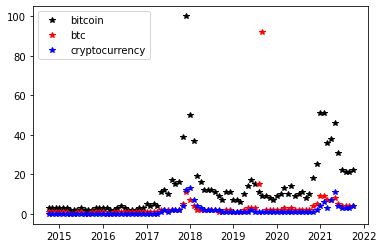

In [40]:
# import matplotlib plotting module to visualize data (make sure matplotlib is installed using pip)
import matplotlib.pyplot as plt

# plot all three trends in same chart
plt.figure()
plt.plot(df.index,df.bitcoin,'k*')
plt.plot(df.index,df.btc,'r*')
plt.plot(df.index,df.cryptocurrency,'b*')
plt.legend(['bitcoin','btc','cryptocurrency'])

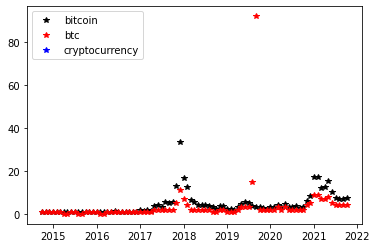

In [41]:
# plot normalized food trends over time
plt.figure()
plt.plot(df.index,df.bitcoin/df.bitcoin.iloc[0],'k*')
plt.plot(df.index,df.btc/df.btc.iloc[0],'r*')
plt.plot(df.index,df.cryptocurrency/df.cryptocurrency.iloc[0],'b*')
plt.legend(['bitcoin','btc','cryptocurrency'])

## Related topics, queries, and suggestions

### Related topics

In [14]:
pytrend.build_payload(kw_list=['bitcoin'], timeframe='2014-09-17 2021-10-16', geo='US')

In [17]:
df_rt = pytrend.related_topics()

In [18]:
df_rt['bitcoin']['rising'].head(5)

,value,formattedValue,link,topic_mid,topic_title,topic_type
0,31250,Breakout,/trends/explore?q=/m/011q8ct1&date=2014-09-17+...,/m/011q8ct1,Robinhood,Company
1,30950,Breakout,/trends/explore?q=/g/11bc72g6gp&date=2014-09-1...,/g/11bc72g6gp,OTCMKTS:GBTC,Topic
2,30200,Breakout,/trends/explore?q=/g/11fkyy78mp&date=2014-09-1...,/g/11fkyy78mp,Bitcoin ATM Near Me,Topic
3,25400,Breakout,/trends/explore?q=/g/11gf2dcwbj&date=2014-09-1...,/g/11gf2dcwbj,Cardano,Blockchain platform
4,24400,Breakout,/trends/explore?q=/g/11hcz1r4wl&date=2014-09-1...,/g/11hcz1r4wl,Binance,Cryptocurrency exchange company


In [32]:
df_rt['bitcoin']['top'].head(20)

,value,formattedValue,hasData,link,topic_mid,topic_title,topic_type
0,100,100,True,/trends/explore?q=/m/05p0rrx&date=2014-09-17+2...,/m/05p0rrx,Bitcoin,Currency
1,44,44,True,/trends/explore?q=/m/01d_1l&date=2014-09-17+20...,/m/01d_1l,Price,Topic
2,6,6,True,/trends/explore?q=/m/077mq&date=2014-09-17+202...,/m/077mq,Stock,Topic
3,5,5,True,/trends/explore?q=/m/09nqf&date=2014-09-17+202...,/m/09nqf,United States Dollar,Currency
4,4,4,True,/trends/explore?q=/m/0108bn2x&date=2014-09-17+...,/m/0108bn2x,Ethereum,Topic
5,3,3,True,/trends/explore?q=/m/053rd&date=2014-09-17+202...,/m/053rd,Mining,Topic
6,2,2,True,/trends/explore?q=/m/0vpj4_b&date=2014-09-17+2...,/m/0vpj4_b,Cryptocurrency,Topic
7,2,2,True,/trends/explore?q=/m/0bhr4z&date=2014-09-17+20...,/m/0bhr4z,Value,Economics
8,2,2,True,/trends/explore?q=/g/11d_wtvc5k&date=2014-09-1...,/g/11d_wtvc5k,Bitcoin Cash,Cash
9,2,2,True,/trends/explore?q=/m/0wr3qjq&date=2014-09-17+2...,/m/0wr3qjq,Coinbase,Cryptocurrency company


### Related queries

In [21]:
df_rq = pytrend.related_queries()

In [22]:
df_rq

{'bitcoin': {'top':                   query  value
  0         bitcoin price    100
  1         bitcoin stock     15
  2           buy bitcoin     10
  3           bitcoin usd      9
  4   bitcoin stock price      9
  5              ethereum      9
  6          bitcoin news      8
  7       what is bitcoin      8
  8        ethereum price      7
  9          bitcoin cash      6
  10     price of bitcoin      6
  11       bitcoin mining      5
  12        bitcoin value      5
  13        bitcoin today      5
  14       usd to bitcoin      5
  15             coinbase      4
  16     bitcoin coinbase      4
  17         bitcoin coin      4
  18       bitcoin wallet      4
  19             litecoin      4
  20    bitcoin price usd      4
  21  bitcoin price today      4
  22        bitcoin worth      3
  23          bitcoin atm      3
  24       reddit bitcoin      3,
  'rising':                       query   value
  0            ethereum price  260600
  1       bitcoin atm near me   42200

### suggestions

In [23]:
df_s = pytrend.suggestions('bitcoin')

In [24]:
df_s

[{'mid': '/m/05p0rrx', 'title': 'Bitcoin', 'type': 'Currency'},
 {'mid': '/g/11gdq16zww', 'title': 'Bitcoin.com', 'type': 'Topic'},
 {'mid': '/m/0y4vk1r', 'title': 'Kraken', 'type': 'Topic'},
 {'mid': '/g/11d_wtvc5k', 'title': 'Bitcoin Cash', 'type': 'Cash'},
 {'mid': '/g/11gfk5l23l', 'title': 'Bitcointalk', 'type': 'Topic'}]

## Trending searches and top search charts

In [25]:
pytrend.trending_searches(pn='united_states')

,0
0,You Season 3
1,Clemson football
2,Red Sox vs Astros
3,Hooters uniforms
4,Moderna booster
5,David Amess
6,Eve
7,Bitcoin
8,Oregon football
9,Addison Rae


In [45]:
pytrend.top_charts(date='2019', hl='en-US', tz=0, geo='US')

,title,exploreQuery
0,Disney Plus,
1,Cameron Boyce,
2,Nipsey Hussle,
3,Hurricane Dorian,
4,Antonio Brown,
5,Luke Perry,
6,Avengers: Endgame,
7,Game of Thrones,
8,iPhone 11,
9,Jussie Smollett,


In [42]:
pytrend.top_charts(date='2020', hl='en-US', tz=0, geo='US')

,title,exploreQuery
0,Election results,
1,Coronavirus,
2,Kobe Bryant,
3,Coronavirus update,
4,Coronavirus symptoms,
5,Zoom,
6,Who is winning the election,
7,Naya Rivera,
8,Chadwick Boseman,
9,PlayStation 5,PS5
